<a href="https://colab.research.google.com/github/Mrunal018/Principle-Component-Analysis/blob/main/SBI_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import plotly.graph_objects as go

In [73]:
data=pd.read_csv('/content/drive/MyDrive/Internship/SBI Historical Data.csv')

In [74]:
data.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,27-05-2024,833.7,832.6,839.40,823.0,12.30M,0.62%
1,24-05-2024,828.6,830.0,841.25,827.0,12.25M,-0.42%
2,23-05-2024,832.1,824.7,835.50,822.0,17.50M,1.63%


**Converting String to integers**

In [75]:

# Function to convert volume strings to numeric values
def convert_volume(vol_str):
    if pd.isna(vol_str):
        return np.nan
    vol_str = vol_str.strip()
    if vol_str[-1] == 'M':
        return float(vol_str[:-1]) * 1_000_000
    elif vol_str[-1] == 'K':
        return float(vol_str[:-1]) * 1_000
    else:
        return float(vol_str)

# Create a DataFrame
df = pd.DataFrame(data)
df = df.interpolate()
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Apply the conversion function to the 'Vol.' column
df['Vol.'] = df['Vol.'].apply(convert_volume)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)


print("DataFrame with converted volume values:")
print(df)
print(df.head(10))

DataFrame with converted volume values:
             Price    Open    High     Low        Vol. Change %
Date                                                           
2024-05-27  833.70  832.60  839.40  823.00  12300000.0    0.62%
2024-05-24  828.60  830.00  841.25  827.00  12250000.0   -0.42%
2024-05-23  832.10  824.70  835.50  822.00  17500000.0    1.63%
2024-05-22  818.75  826.55  826.65  813.55  19240000.0   -1.43%
2024-05-21  830.65  821.00  836.30  819.60  14040000.0    1.18%
...            ...     ...     ...     ...         ...      ...
2010-02-04  194.79  199.60  199.67  194.00  35360000.0   -2.55%
2010-02-03  199.88  198.63  201.59  198.35  30450000.0    1.03%
2010-02-02  197.84  203.02  204.52  197.41  24090000.0   -2.12%
2010-02-01  202.12  214.80  214.80  201.55  22050000.0   -1.72%
2010-01-29  205.66  199.00  206.74  195.50  46490000.0    2.67%

[3554 rows x 6 columns]
             Price    Open    High     Low        Vol. Change %
Date                                   

**Sorting**

In [76]:
df2 = df.sort_values(by='Date', ascending=True)
print("\nDataFrame sorted by date in ascending order:")
print(df2)


DataFrame sorted by date in ascending order:
             Price    Open    High     Low        Vol. Change %
Date                                                           
2010-01-29  205.66  199.00  206.74  195.50  46490000.0    2.67%
2010-02-01  202.12  214.80  214.80  201.55  22050000.0   -1.72%
2010-02-02  197.84  203.02  204.52  197.41  24090000.0   -2.12%
2010-02-03  199.88  198.63  201.59  198.35  30450000.0    1.03%
2010-02-04  194.79  199.60  199.67  194.00  35360000.0   -2.55%
...            ...     ...     ...     ...         ...      ...
2024-05-21  830.65  821.00  836.30  819.60  14040000.0    1.18%
2024-05-22  818.75  826.55  826.65  813.55  19240000.0   -1.43%
2024-05-23  832.10  824.70  835.50  822.00  17500000.0    1.63%
2024-05-24  828.60  830.00  841.25  827.00  12250000.0   -0.42%
2024-05-27  833.70  832.60  839.40  823.00  12300000.0    0.62%

[3554 rows x 6 columns]


In [77]:
df2.index = pd.to_datetime(df2.index)
print("\nDataFrame with datetime index:")
print(df2)


DataFrame with datetime index:
             Price    Open    High     Low        Vol. Change %
Date                                                           
2010-01-29  205.66  199.00  206.74  195.50  46490000.0    2.67%
2010-02-01  202.12  214.80  214.80  201.55  22050000.0   -1.72%
2010-02-02  197.84  203.02  204.52  197.41  24090000.0   -2.12%
2010-02-03  199.88  198.63  201.59  198.35  30450000.0    1.03%
2010-02-04  194.79  199.60  199.67  194.00  35360000.0   -2.55%
...            ...     ...     ...     ...         ...      ...
2024-05-21  830.65  821.00  836.30  819.60  14040000.0    1.18%
2024-05-22  818.75  826.55  826.65  813.55  19240000.0   -1.43%
2024-05-23  832.10  824.70  835.50  822.00  17500000.0    1.63%
2024-05-24  828.60  830.00  841.25  827.00  12250000.0   -0.42%
2024-05-27  833.70  832.60  839.40  823.00  12300000.0    0.62%

[3554 rows x 6 columns]


In [82]:
df2 = df2.drop('Change %', axis=1)

**Plotting time series for SBI Price**

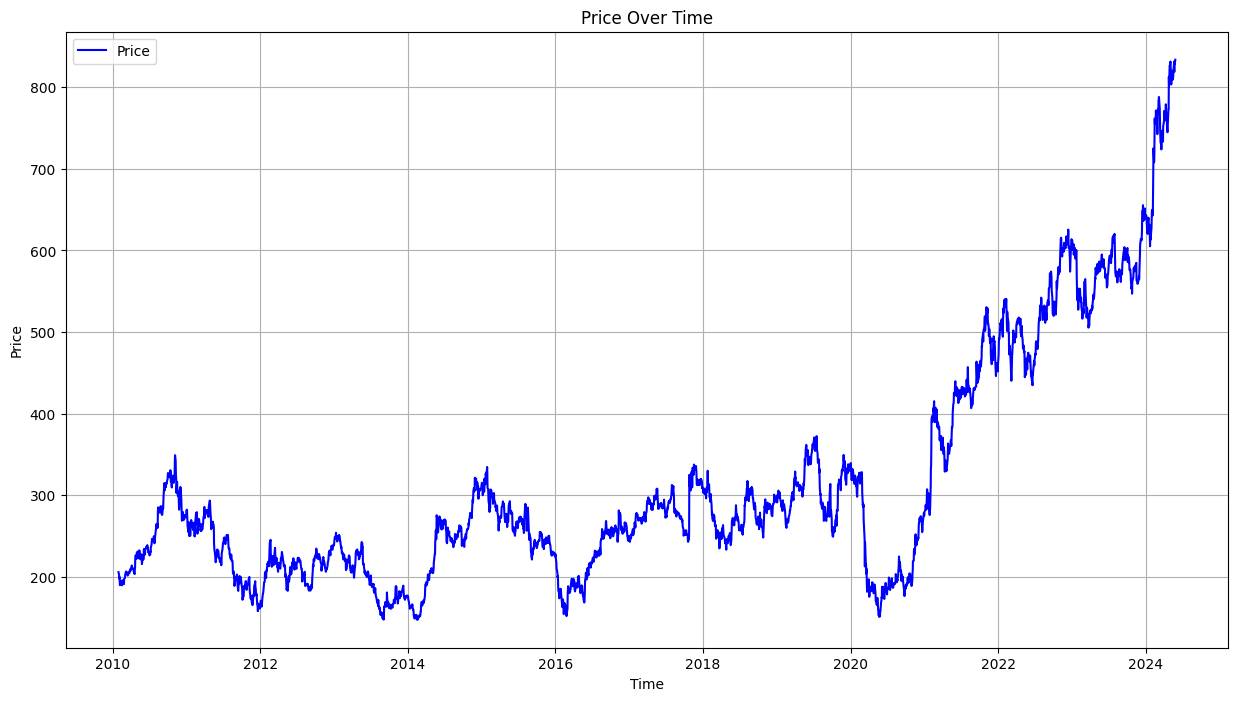

In [ ]:
# Plot For Price Over Time
plt.figure(figsize=(15, 8))
plt.plot(df2.index, df2['Price'], label='Price', color='blue')
plt.title('Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:** As we can observe increasing trend in recent 4 years

**Volume**

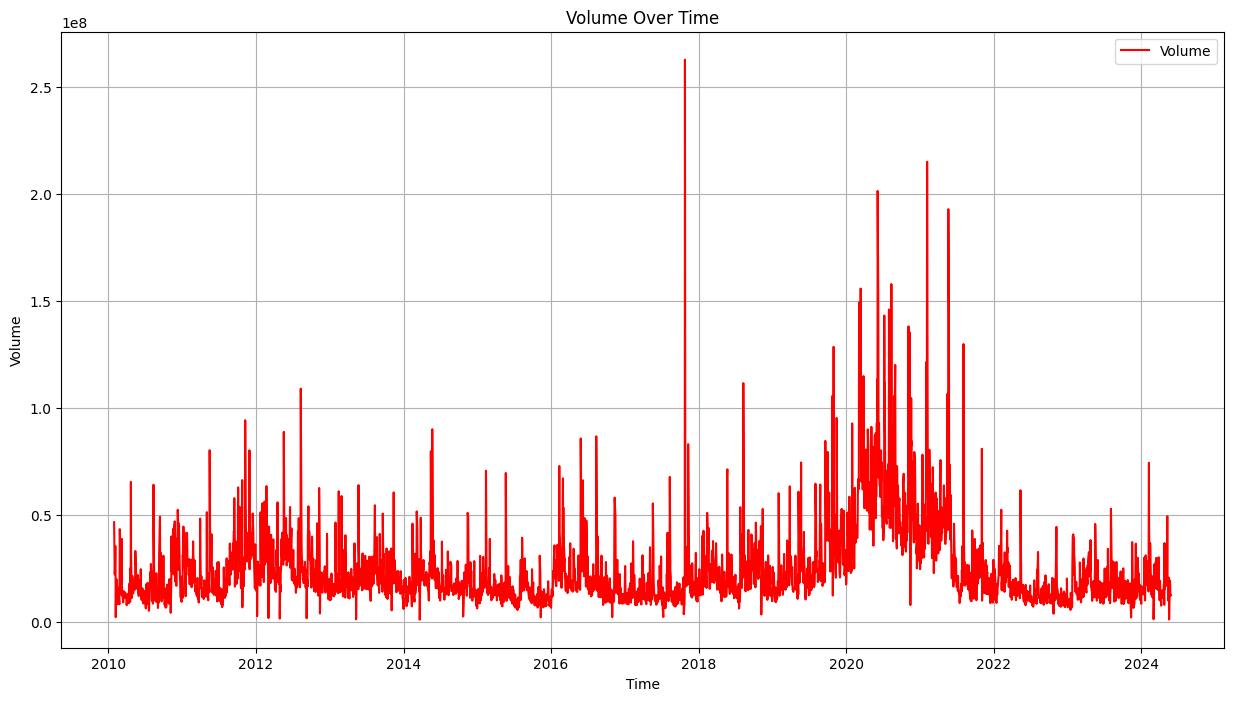

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df2.index, df2['Vol.'], label='Volume', color='red')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:** Even if we are observing trend the volume remains constant over the time period.

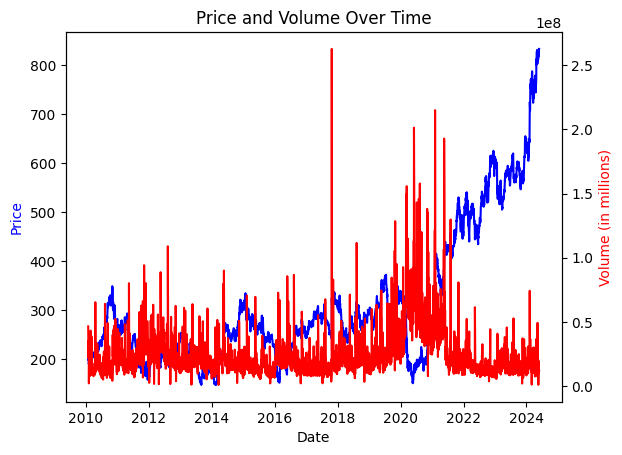

In [ ]:
fig, ax1 = plt.subplots()

# Plot price on the primary y-axis
ax1.plot(df2.index, df2['Price'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot volume on the secondary y-axis
ax2.plot(df2.index, df2['Vol.'], color='red')
ax2.set_ylabel('Volume (in millions)', color='red')

plt.title('Price and Volume Over Time')
plt.show()

# **Checking Monthly And Daily Seasonality**

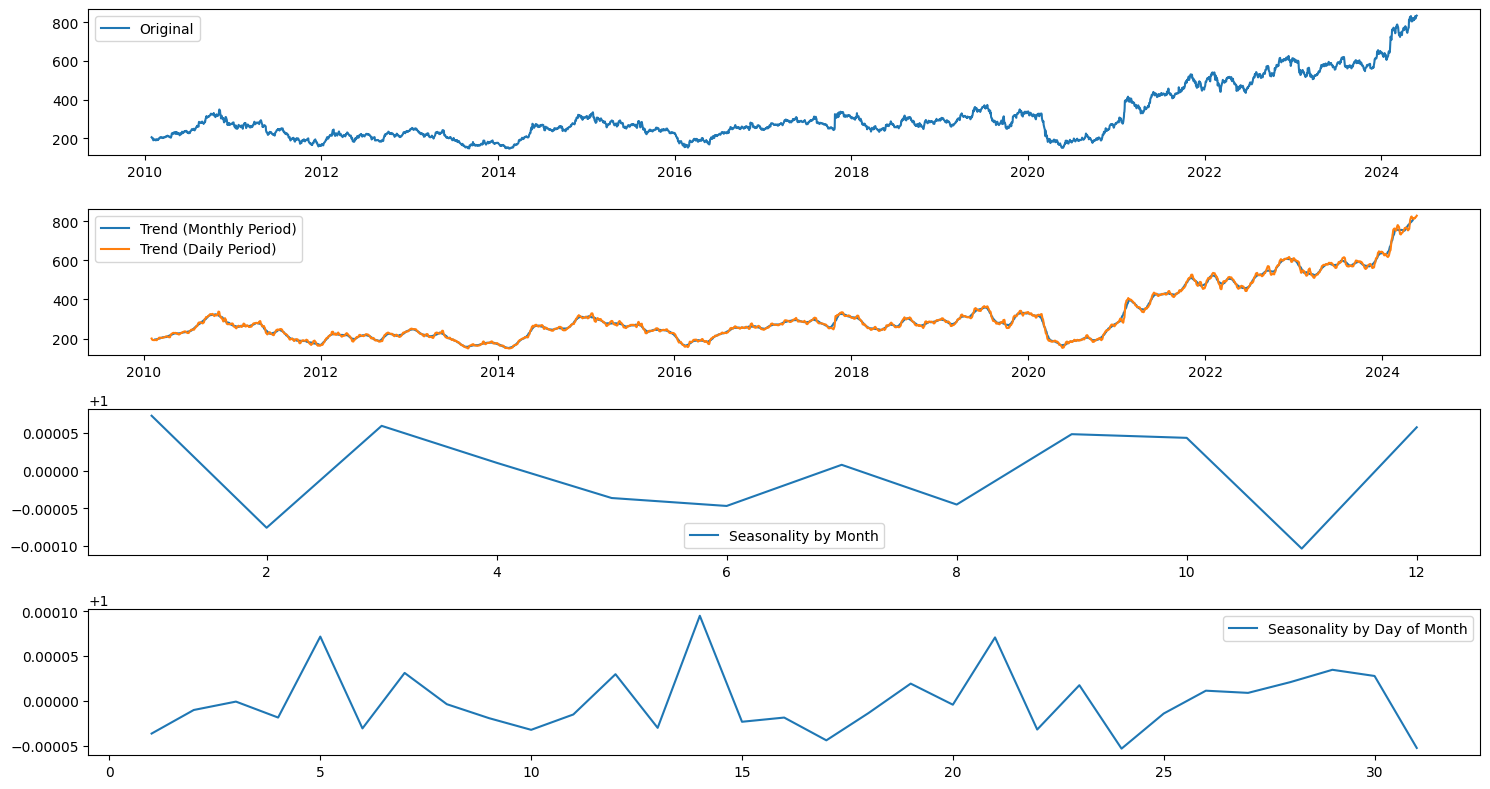

In [ ]:
# Seasonal decomposition
result_monthly = seasonal_decompose(df2['Price'], model='multiplicative', period=24)  # Monthly period
result_daily = seasonal_decompose(df2['Price'], model='multiplicative', period=5)  # Daily period

# Plot the results
plt.figure(figsize=(15, 8))

# Plot original data
plt.subplot(411)
plt.plot(df2['Price'], label='Original')  # Plot the 'close' column
plt.legend(loc='best')

# Plot trend component
plt.subplot(412)
plt.plot(result_monthly.trend, label='Trend (Monthly Period)')
plt.plot(result_daily.trend, label='Trend (Daily Period)')
plt.legend(loc='best')

# Plot seasonal component by months
seasonal_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
plt.subplot(413)
plt.plot(seasonal_monthly, label='Seasonality by Month')
plt.legend(loc='best')

# Plot seasonal component by days of the month
seasonal_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()
plt.subplot(414)
plt.plot(seasonal_daily, label='Seasonality by Day of Month')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
price_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
price_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()

In [ ]:
print(price_monthly)
print(price_daily)

Date
1     0.999985
2     0.999947
3     1.000053
4     1.000030
5     0.999913
6     1.000124
7     0.999905
8     1.000033
9     1.000015
10    0.999998
11    0.999976
12    1.000029
Name: seasonal, dtype: float64
Date
1     0.999963
2     0.999990
3     0.999999
4     0.999981
5     1.000072
6     0.999969
7     1.000031
8     0.999996
9     0.999981
10    0.999968
11    0.999985
12    1.000030
13    0.999970
14    1.000095
15    0.999977
16    0.999981
17    0.999956
18    0.999986
19    1.000019
20    0.999996
21    1.000071
22    0.999968
23    1.000017
24    0.999947
25    0.999986
26    1.000011
27    1.000009
28    1.000021
29    1.000035
30    1.000028
31    0.999947
Name: seasonal, dtype: float64


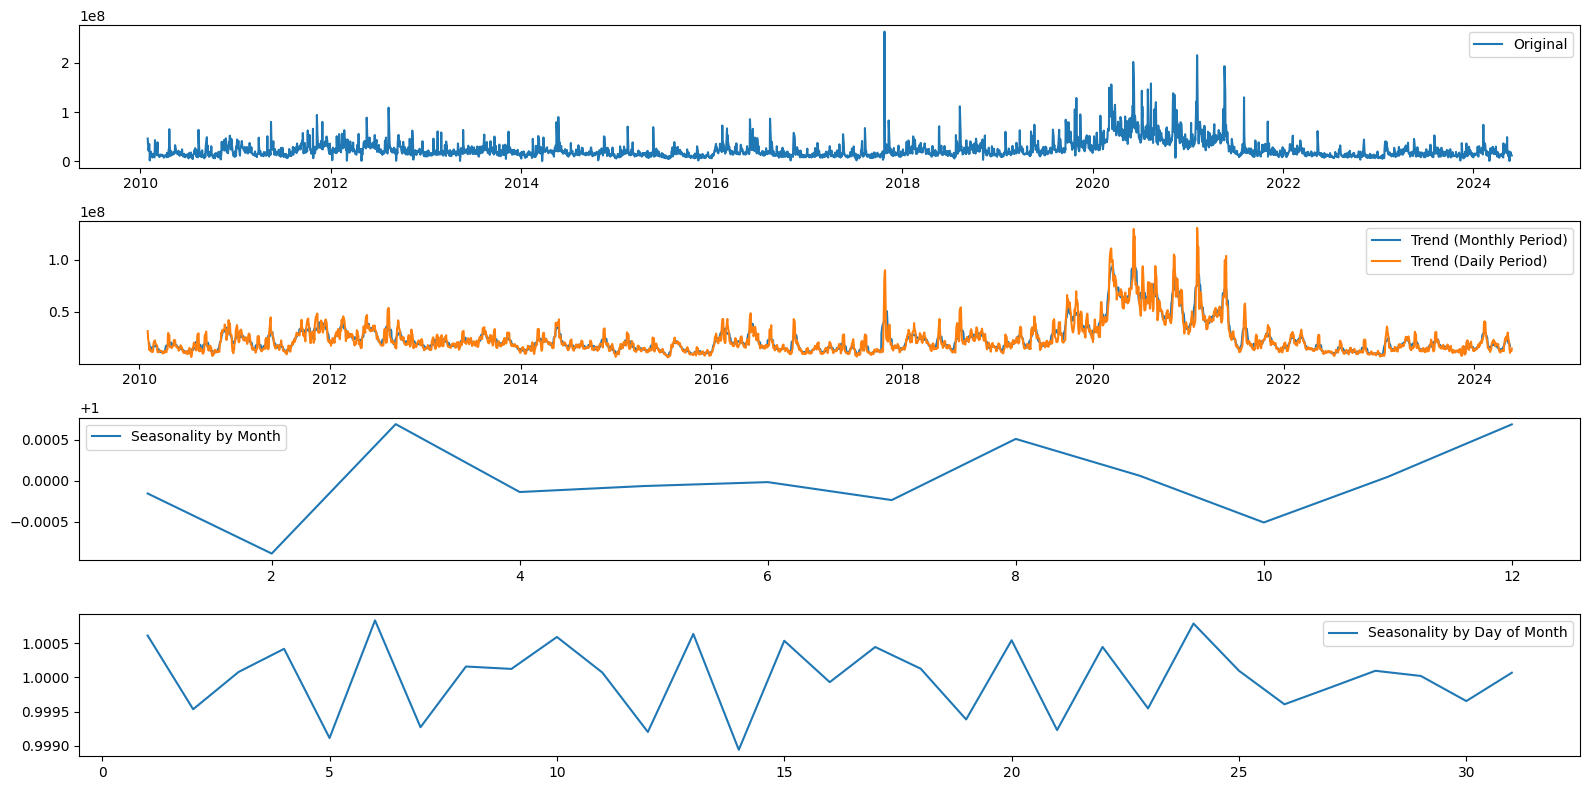

In [ ]:
# Seasonal decomposition
result_monthly = seasonal_decompose(df2['Vol.'], model='multiplicative', period=15)  # Monthly period
result_daily = seasonal_decompose(df2['Vol.'], model='multiplicative', period=7)  # Daily period

# Plot the results
plt.figure(figsize=(16, 8))

# Plot original data
plt.subplot(411)
plt.plot(df2['Vol.'], label='Original')  # Plot the 'close' column
plt.legend(loc='best')

# Plot trend component
plt.subplot(412)
plt.plot(result_monthly.trend, label='Trend (Monthly Period)')
plt.plot(result_daily.trend, label='Trend (Daily Period)')
plt.legend(loc='best')

# Plot seasonal component by months
seasonal_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
plt.subplot(413)
plt.plot(seasonal_monthly, label='Seasonality by Month')
plt.legend(loc='best')

# Plot seasonal component by days of the month
seasonal_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()
plt.subplot(414)
plt.plot(seasonal_daily, label='Seasonality by Day of Month')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Interpretation:** Looking at the Subplots we can observe that there is no seasonality present daily and montly in both Price And Volume.

**ACF AND PACF to check stationarity**

<Figure size 1200x600 with 0 Axes>

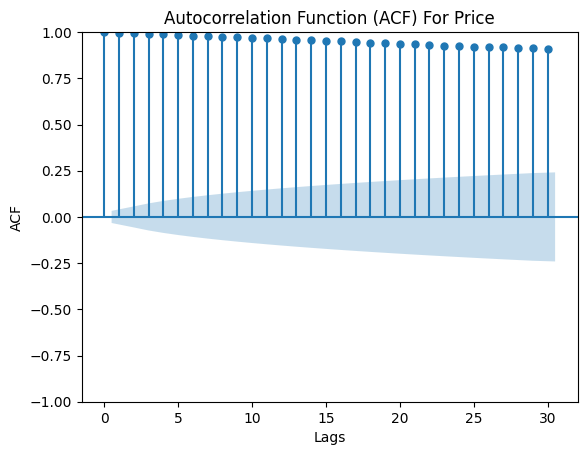

<Figure size 1200x600 with 0 Axes>

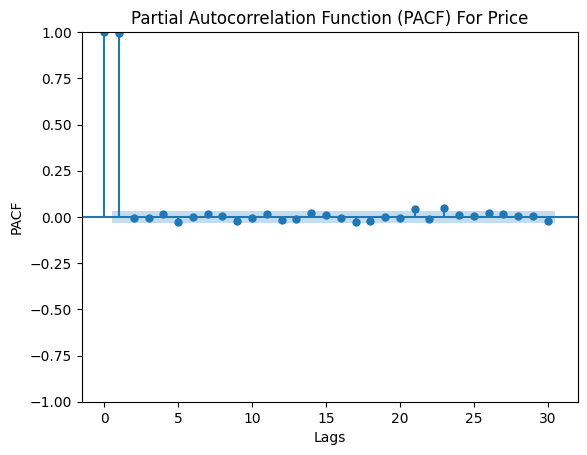

<Figure size 1200x600 with 0 Axes>

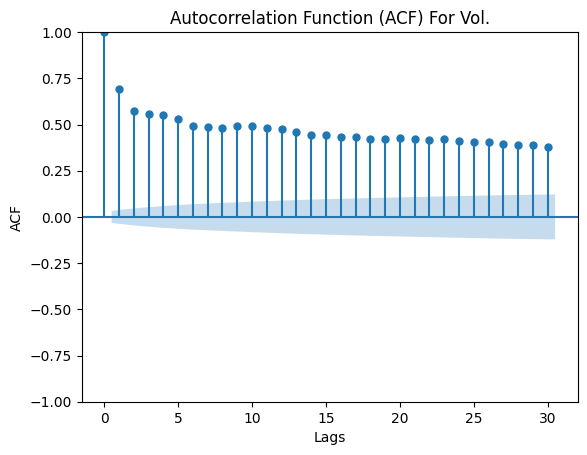

<Figure size 1200x600 with 0 Axes>

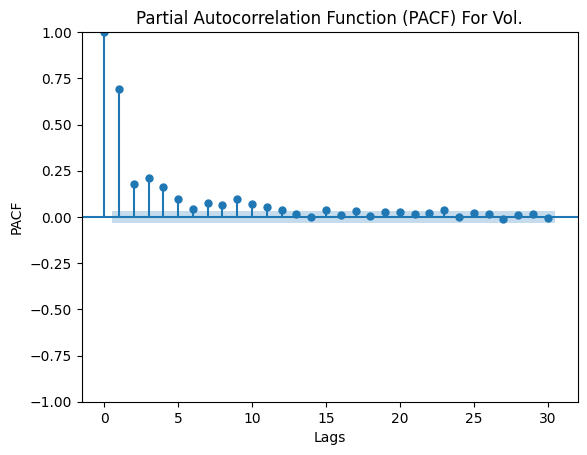

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(df2['Price'], lags=30, title='Autocorrelation Function (ACF) For Price')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df2['Price'], lags=30, title='Partial Autocorrelation Function (PACF) For Price')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(df2['Vol.'], lags=30, title='Autocorrelation Function (ACF) For Vol.')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df2['Vol.'], lags=30, title='Partial Autocorrelation Function (PACF) For Vol.')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

**Interpretation:** We can observe in PACF plot, sharp cutoff in the plot at a particular lag may indicate the presence of a seasonal pattern in the data.

# Seasonal decomposition

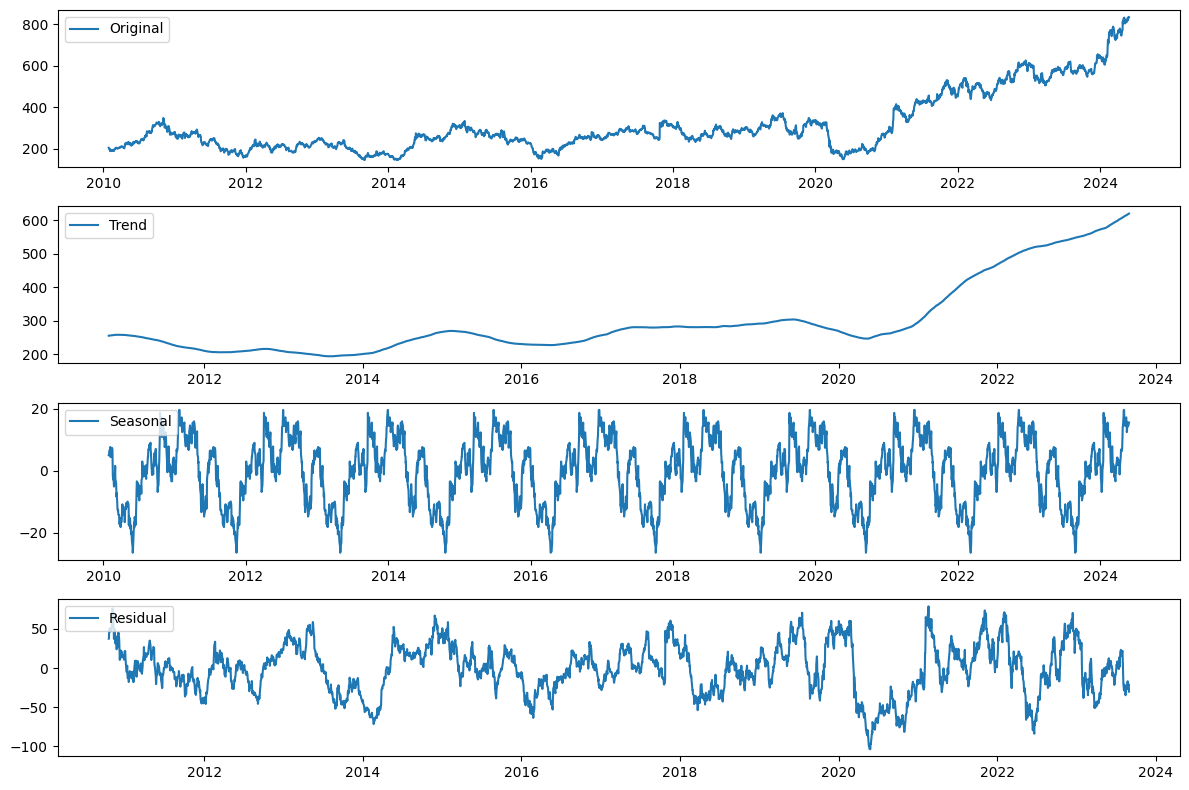

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on a specific column of the DataFrame
decomposition = seasonal_decompose(df2['Price'], model='additive', period=365)  # Replace 'price' with the relevant column name

# Plot the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df2['Price'], label='Original')  # Replace 'Price' with the relevant column name
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




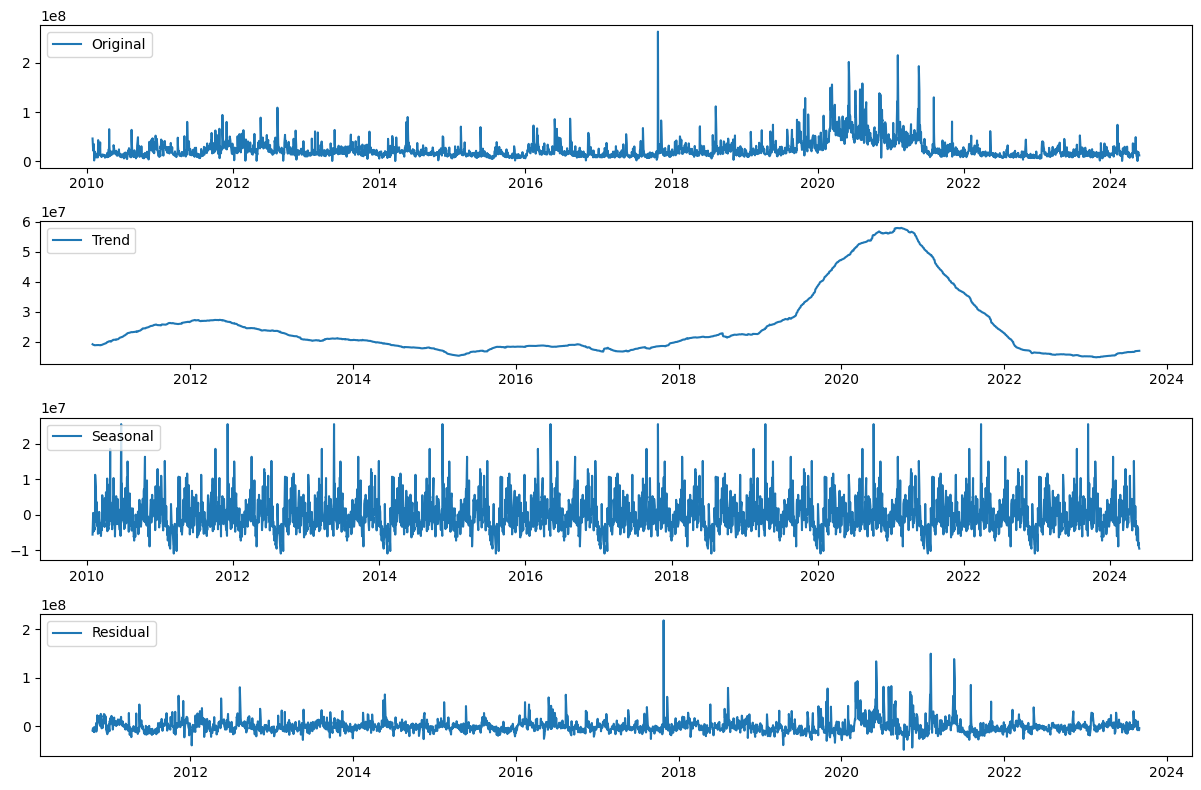

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on a specific column of the DataFrame
decomposition = seasonal_decompose(df2['Vol.'], model='additive', period=365)  # Replace 'price' with the relevant column name

# Plot the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df2['Vol.'], label='Original')  # Replace 'price' with the relevant column name
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




**Interpretation:**

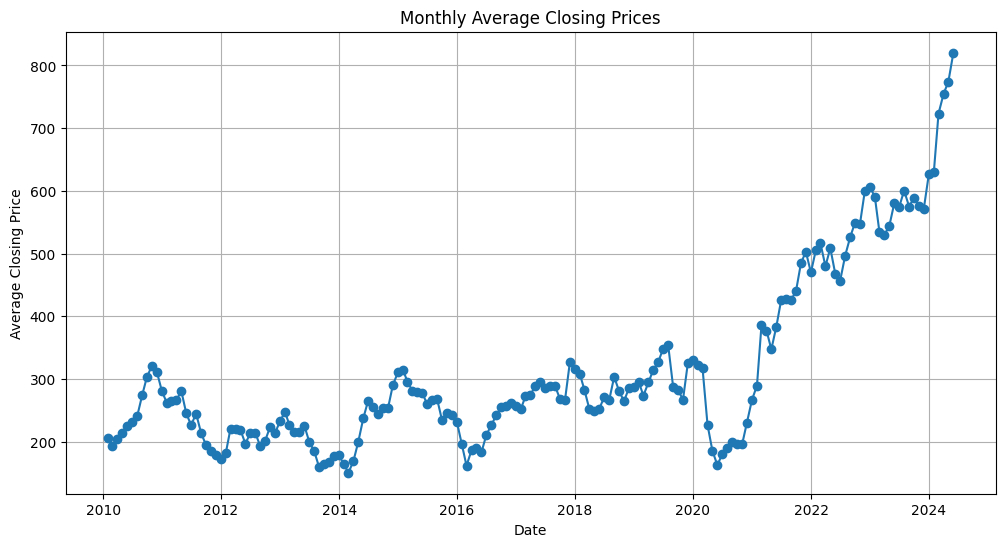

In [89]:
monthly_data = df2.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Price'], marker='o', linestyle='-')
plt.title('Monthly Average Closing Prices')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()

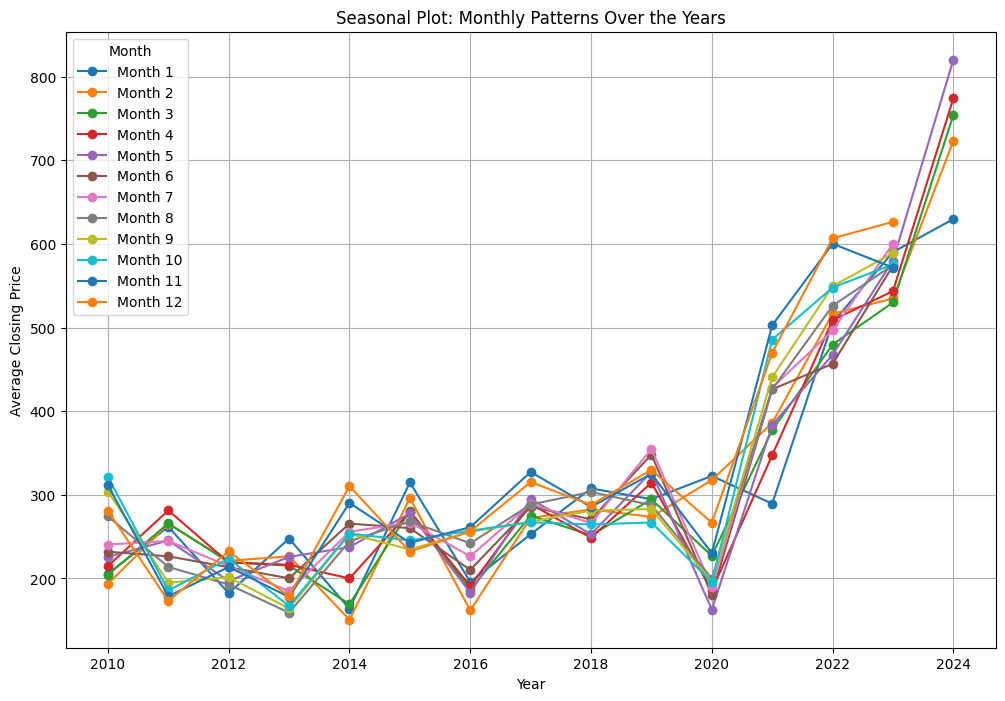

<Figure size 1200x800 with 0 Axes>

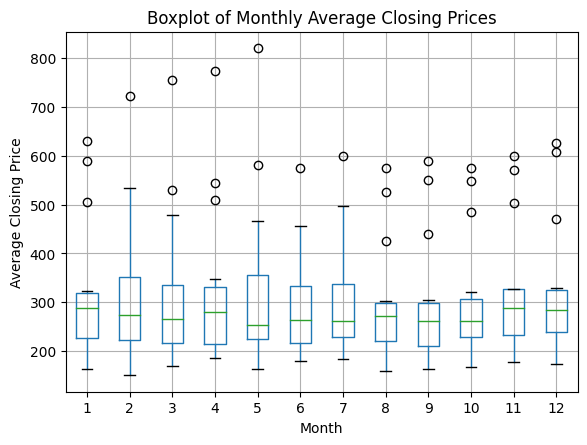

In [90]:
#seasonal plot
monthly_data['Month'] = monthly_data.index.month
monthly_data['Year'] = monthly_data.index.year

plt.figure(figsize=(12, 8))
for month in range(1, 13):
    month_data = monthly_data[monthly_data['Month'] == month]
    plt.plot(month_data['Year'], month_data['Price'], marker='o', linestyle='-', label=f'Month {month}')

plt.title('Seasonal Plot: Monthly Patterns Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

# Boxplot to observe the distribution of each month over multiple years
plt.figure(figsize=(12, 8))
monthly_data.boxplot(column='Price', by='Month', grid=True)
plt.title('Boxplot of Monthly Average Closing Prices')
plt.suptitle('')  # Suppress the automatic title to only keep the custom title
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()

# **Flag And Pole Pattern**

In [91]:
print(df2.columns)

Index(['Price', 'Open', 'High', 'Low', 'Vol.'], dtype='object')


In [ ]:

import datetime as dt

fig = go.Figure()

# Extract dates from the index
dates = df2.index

fig.add_trace(go.Scatter(x=list(dates), y=list(df2['Price'])))
fig.update_layout(title_text="SBI Time series with range slider and selectors")
fig.show()


In [ ]:
fig = go.Figure()
# Extract dates from the index
dates = df2.index
fig.add_trace(go.Scatter(x=list(dates), y=list(df2['Vol.'])))
fig.update_layout(title_text="BTC Time series with range slider and selectors")
fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming 'dates' is a list of datetime objects and 'df2' is your DataFrame
dates = df2.index
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=df2['Open'],
    high=df2['High'],
    low=df2['Low'],
    close=df2['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

fig.update_layout(
    title='Candlestick Chart for SBI in 2024',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[df2['Low'].min() * 0.95, df2['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=False  # Disable the range slider on the x-axis
)
fig.show()

In [10]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'df2' is your DataFrame with a DatetimeIndex
# Filter the DataFrame for the period 2010 to 2014
sbi2 = df2[(df2.index >= '2010-01-01') & (df2.index <= '2014-12-31')]
dates = sbi2.index

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=sbi2['Open'],
    high=sbi2['High'],
    low=sbi2['Low'],
    close=sbi2['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

fig.update_layout(
    title='Candlestick Chart for SBI from 2010 to 2014',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[sbi2['Low'].min() * 0.95, sbi2['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=True  # Enable the range slider on the x-axis
)

fig.show()


In [ ]:
sbi1 = df2[df2.index > '2020-01-01']

fig = go.Figure(data=[go.Candlestick(x=sbi1.index, open=sbi1['Open'], high=sbi1['High'],low=sbi1['Low'],close=sbi1['Price'])])
fig.update_layout(title='SBI Price In 2024',yaxis_title='SBI Price',yaxis=dict(range=[100, max(sbi1['High'])]))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=sbi1.index, open=sbi1['Open'], high=sbi1['High'],low=sbi1['Low'],close=sbi1['Price'])])
fig.update_layout(title='SBI Price In 2024',yaxis_title='SBI Price',)
fig.show()

In [13]:
sbi3 = df2[(df2.index >= '2015-01-01') & (df2.index <= '2018-12-31')]
dates = sbi3.index

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=sbi3['Open'],
    high=sbi3['High'],
    low=sbi3['Low'],
    close=sbi3['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

fig.update_layout(
    title='Candlestick Chart for SBI from 2015 to 2018',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[sbi3['Low'].min() * 0.95, sbi3['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=True  # Enable the range slider on the x-axis
)

fig.show()

In [14]:
sbi4 = df2[(df2.index >= '2019-01-01') & (df2.index <= '2022-12-31')]
dates = sbi4.index

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=sbi4['Open'],
    high=sbi4['High'],
    low=sbi4['Low'],
    close=sbi4['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

fig.update_layout(
    title='Candlestick Chart for SBI from 2019 to 2022',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[sbi4['Low'].min() * 0.95, sbi4['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=True  # Enable the range slider on the x-axis
)

fig.show()

In [15]:
sbi5 = df2[(df2.index >= '2023-01-01') & (df2.index <= '2024-12-31')]
dates = sbi5.index

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=sbi5['Open'],
    high=sbi5['High'],
    low=sbi5['Low'],
    close=sbi5['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

fig.update_layout(
    title='Candlestick Chart for SBI from 2023 to 2024',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[sbi5['Low'].min() * 0.95, sbi5['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=True  # Enable the range slider on the x-axis
)

fig.show()

In [16]:

dates = df2.index

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=df2['Open'],
    high=df2['High'],
    low=df2['Low'],
    close=df2['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

fig.update_layout(
    title='Candlestick Chart for SBI from 2010 to 2014',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[df2['Low'].min() * 0.95, df2['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=True  # Enable the range slider on the x-axis
)

fig.show()

In [52]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    # Convert l to integer index if it's a Timestamp
    if isinstance(l, pd.Timestamp):
        l = df1.index.get_loc(l)

    if l-n1 < 0 or l+n2 >= len(df1):
        return 0

    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.Low[l]>df1.Low[i]):
            pividlow=0
        if(df1.High[l]<df1.High[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0

df['pivot'] = df2.apply(lambda x: pivotid(df2, x.name,5,5), axis=1)

In [53]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    # Convert l to integer index if it's a Timestamp
    if isinstance(l, pd.Timestamp):
        l = df1.index.get_loc(l)

    if l-n1 < 0 or l+n2 >= len(df1):
        return 0

    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.Low[l]>df1.Low[i]):
            pividlow=0
        if(df1.High[l]<df1.High[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0

# Calculate 'pivot' column and store it in df2
df2['pivot'] = df2.apply(lambda x: pivotid(df2, x.name,3,3), axis=1) # Changed df to df2

def pointpos(x):
    if x['pivot']==1:
        return x['Low']-1e-3
    elif x['pivot']==2:
        return x['High']+1e-3
    else:
        return np.nan

df2['pointpos'] = df2.apply(lambda row: pointpos(row), axis=1)

In [56]:
# Slice df2 *after* 'pointpos' is calculated
dfpl = df2[2500:3800]

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Price'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [46]:
import pandas as pd
import plotly.graph_objects as go

# Filter the DataFrame for the period 2010 to 2014
dfpl = df2[(df2.index >= '2022-01-01') & (df2.index <= '2024-12-31')]

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=dfpl.index,
    open=dfpl['Open'],
    high=dfpl['High'],
    low=dfpl['Low'],
    close=dfpl['Price'],
    increasing_line_color='green',  # Color for increasing candles
    decreasing_line_color='red',    # Color for decreasing candles
    increasing=dict(line=dict(width=1)),  # Set the width of increasing candles' lines
    decreasing=dict(line=dict(width=1))   # Set the width of decreasing candles' lines
)])

# Adding scatter plot for pointpos
fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")

fig.update_layout(
    title='Candlestick Chart for SBI from 2022 to 2024',
    yaxis_title='SBI Price',
    yaxis=dict(
        range=[dfpl['Low'].min() * 0.95, dfpl['High'].max() * 1.05],  # Adjust the range for better visibility
        fixedrange=False  # Allow zooming on the y-axis
    ),
    xaxis_rangeslider_visible=True  # Enable the range slider on the x-axis
)

fig.show()


In [55]:
# Slice df2 *after* 'pointpos' is calculated
dfpl = df2[500:800]

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Price'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [62]:
from scipy.stats import linregress
import plotly.graph_objects as go
import numpy as np # Import numpy

def detect_flag(candle, backcandles, window, plot_flag=False):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    localdf = df2.iloc[candle-backcandles-window:candle-window]
    highs = localdf[localdf['pivot'] == 2]['High'].tail(3).values
    idxhighs = localdf[localdf['pivot'] == 2].index[-3:]
    lows = localdf[localdf['pivot'] == 1]['Low'].tail(3).values
    idxlows = localdf[localdf['pivot'] == 1].index[-3:]

    if len(highs) == 3 and len(lows) == 3:
        order_condition = (
            (idxlows[0] < idxhighs[0] < idxlows[1] < idxhighs[1] < idxlows[2] < idxhighs[2]) or
            (idxhighs[0] < idxlows[0] < idxhighs[1] < idxlows[1] < idxhighs[2] < idxlows[2])
        )

        # Convert datetime indices to numerical representation for linear regression
        idxlows_num = np.array([(dt - idxlows[0]).total_seconds() for dt in idxlows])
        idxhighs_num = np.array([(dt - idxhighs[0]).total_seconds() for dt in idxhighs])

        slmin, intercmin, rmin, _, _ = linregress(idxlows_num, lows)
        slmax, intercmax, rmax, _, _ = linregress(idxhighs_num, highs)

        if (order_condition and (rmax*rmax) >= 0.9 and (rmin*rmin) >= 0.9 and slmin >= 0.0001 and slmax <= -0.0001):
            if plot_flag:
                fig = go.Figure(data=[go.Candlestick(
                    x=localdf.index,
                    open=localdf['Open'],
                    high=localdf['High'],
                    low=localdf['Low'],
                    close=localdf['Price']
                )])

                fig.add_scatter(x=localdf.index, y=localdf['pointpos'], mode="markers",
                                marker=dict(size=10, color="MediumPurple"),
                                name="pivot")
                # Use the original datetime indices for plotting
                fig.add_trace(go.Scatter(x=idxlows, y=slmin * idxlows_num + intercmin, mode='lines', name='min slope'))
                fig.add_trace(go.Scatter(x=idxhighs, y=slmax * idxhighs_num + intercmax, mode='lines', name='max slope'))

                fig.update_layout(
                    xaxis_rangeslider_visible=False,
                    plot_bgcolor='white',  # change the background to white
                    xaxis=dict(showgrid=True, gridcolor='white'),  # change the x-axis grid to white
                    yaxis=dict(showgrid=True, gridcolor='white')  # change the y-axis grid to white
                )
                fig.show()

            return 1

    return 0

In [63]:
detect_flag(2000, 5, 30, plot_flag=True)

0